In [2]:
import numpy as np
import pandas as pd
import MeMo.nwbio as nwbio
import matplotlib.pyplot as plt
import seaborn as sns
import eFELExt
eFELExt.efel.setThreshold(-30)

In [3]:
hof = sorted(list(np.load('vmcell/hof_chk2.npy', allow_pickle=True).tolist().keys()))
hof_map = {}

k = 0
control_flag = True
for x in hof:
    if x[0].startswith('lesioned') and control_flag:
        k = 0
        control_flag = False
    hof_map[x] = k
    k += 1
    
hof_map

{('control_719', 2891, 35): 0,
 ('control_719', 3277, 39): 1,
 ('control_719', 4830, 9): 2,
 ('control_719', 6265, 36): 3,
 ('control_719', 7655, 35): 4,
 ('control_719', 8060, 3): 5,
 ('control_719', 8279, 15): 6,
 ('control_719', 10497, 28): 7,
 ('control_719', 11219, 12): 8,
 ('control_719', 11646, 20): 9,
 ('control_719', 12618, 17): 10,
 ('control_719', 12644, 36): 11,
 ('control_719', 13866, 6): 12,
 ('control_719', 14437, 18): 13,
 ('control_719', 14493, 15): 14,
 ('control_719', 14641, 17): 15,
 ('control_719', 15418, 22): 16,
 ('control_719', 15680, 18): 17,
 ('control_719', 15895, 17): 18,
 ('control_719', 16641, 43): 19,
 ('control_719', 17211, 38): 20,
 ('control_719', 17878, 18): 21,
 ('control_719', 17894, 20): 22,
 ('control_719', 18013, 29): 23,
 ('control_719', 18277, 35): 24,
 ('control_719', 18611, 10): 25,
 ('control_719', 19494, 32): 26,
 ('control_719', 19842, 33): 27,
 ('lesioned_719', 1280, 4): 0,
 ('lesioned_719', 2028, 3): 1,
 ('lesioned_719', 3671, 1): 2,
 ('

## 1. Data loading and preparation

In [15]:
f = nwbio.FileReader('/home/francesco/backup/data/test_data/test_stress_1_0.nwb')
tab = f.session_description.copy()

for file_key in f.keys():
    idx = file_key.split('.')[0]
    tab.loc[idx, 'file_object'] = f
    tab.loc[idx, 'file_key'] = file_key

    # extract info
    tp, vp = f.read(file_key)
    t = np.linspace(10000, 20000, 1000000)
    v = np.interp(t, tp, vp)

    # pack up data
    r = eFELExt.getFeatureValues(
        {
            'T':t,
            'V':v,
            'stim_start':[10000],
            'stim_end':[20000]
        },
        ['AP_amplitude', 'AP_count']
    )
    
    # copy into the table
    for feature_name, feature_value in r.items():
        tab.loc[idx, feature_name] = feature_value

/home/francesco/anaconda3/lib/python3.9/site-packages/efel/api.py:501: RuntimeWarning: Error while calculating feature AP_amplitude: AP_amplitude: More peak_voltage entries during the stimulus than AP_begin_indices entries
  warnings.warn(
/home/francesco/anaconda3/lib/python3.9/site-packages/efel/api.py:501: RuntimeWarning: Error while calculating feature AP_amplitude: 
Voltage never goes below or above threshold in spike detection.

 At least one spike required for calculation of min_AHP_indices.

Feature [min_AHP_indices] is missing

Feature [peak_voltage] is missing
AP_amplitude: Error calculating peak_voltage
  warnings.warn(
/home/francesco/anaconda3/lib/python3.9/site-packages/efel/api.py:501: RuntimeWarning: Error while calculating feature AP_begin_voltage: 
Voltage never goes below or above threshold in spike detection.

 At least one spike required for calculation of min_AHP_indices.

Feature [min_AHP_indices] is missing

Feature [AP_begin_indices] is missing

  warnings.warn

In [16]:
tab['lesioned'] = tab['lesioned'].astype(bool)
tab['AP_count'] = tab['AP_count'] / 10.0

In [17]:
# calculate drop tstop, calculate mean, and drop nans
descr = tab.drop('tstop', axis=1).groupby(['lesioned', 'cellid']).mean().dropna().reset_index()
descr

,lesioned,cellid,seed,AP_amplitude,AP_count
0,False,0,15750.0,17.765061,1.08
1,False,1,15750.0,24.189488,12.67
2,False,2,15750.0,13.479869,1.80
3,False,3,15750.0,18.660257,2.13
4,False,4,15750.0,19.422644,10.31
5,False,5,15750.0,17.996740,46.69
6,False,6,15750.0,22.756534,22.66
7,False,7,15750.0,21.138915,0.21
8,False,8,15750.0,12.888375,0.88
9,False,9,15750.0,13.829712,14.56


<AxesSubplot:xlabel='AP_amplitude', ylabel='Percent'>

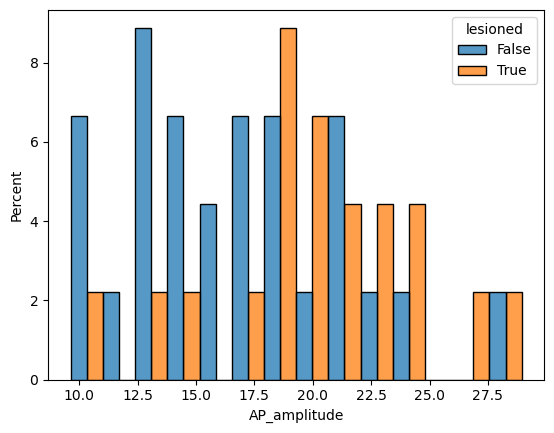

In [18]:
# histogram
sns.histplot(data=descr, x='AP_amplitude', hue='lesioned', stat='percent', multiple='dodge', bins=14)

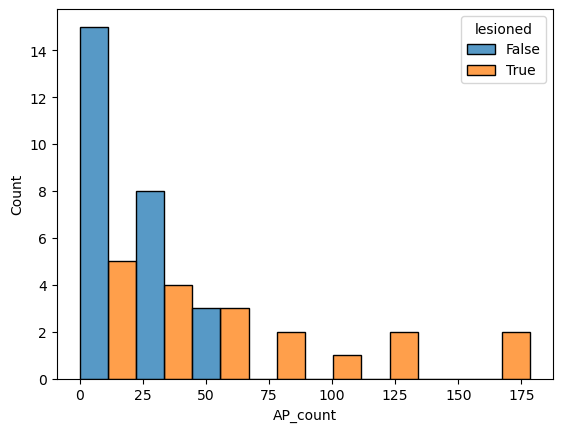

In [19]:
# histogram
ax = sns.histplot(data=descr, x='AP_count', hue='lesioned', stat='count', multiple='dodge')

In [20]:
descr_sel = descr[descr.AP_count.between(2.5, 90)]

In [21]:
descr_sel['lesioned'].value_counts()

False    17
True     12
Name: lesioned, dtype: int64

In [22]:
descr_sel.groupby('lesioned')['AP_count'].mean()

lesioned
False    25.435882
True     41.763333
Name: AP_count, dtype: float64

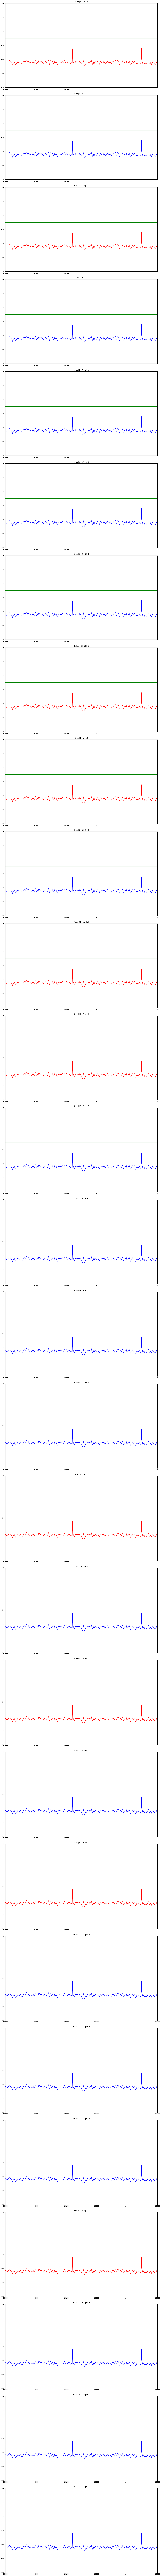

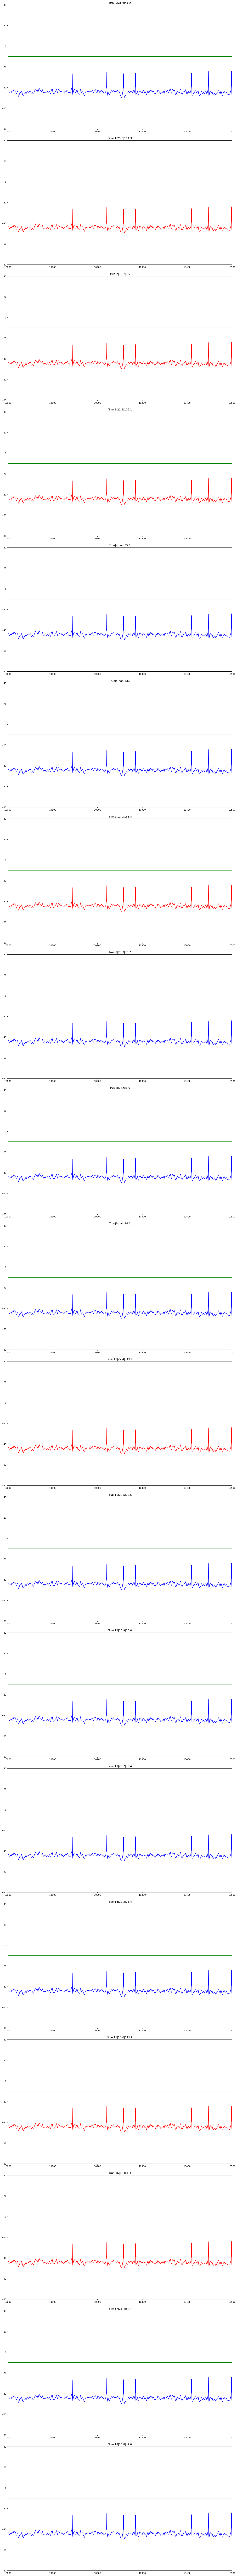

In [23]:
# plot traces
for k1, g in tab[tab.seed == 0].groupby('lesioned'):
    plt.figure(figsize=(15, 7.5*67))
    for i, (k2, r) in enumerate(g.iterrows()):
        plt.subplot(60, 1, i+1)

        if r.AP_count >= 2.5 and r.AP_count <= 90:
            color = 'blue'
        else:
            color = 'red'
            
        plt.title(str(k1) + '|' + str(r['cellid']) + '|' + str(round(r.AP_amplitude,1)) + '|' + str(round(r.AP_count,1)) )
        
        plt.plot(t, v, color=color)
        plt.plot([10000, 11000], [-10, -10], color='green')
        plt.ylim([-80, 40])
        plt.xlim([10000, 10500])
        
    plt.tight_layout(pad=2)
    plt.show()

In [24]:
# load hof at 2nd check
hof_chk2 = np.load('vmcell/hof_chk2.npy', allow_pickle=True).tolist()

# hof at 3rd check
hof_chk3 = {}

# reorganized selected hof at 3rd check
descr_sel = descr_sel.reset_index().set_index('lesioned')

cnt = {True:0, False:0}
for key, info in sorted(hof_chk2.items()):
    lflag = key[0].startswith('lesioned') # lesioned ?
    if cnt[lflag] in descr_sel.loc[lflag, 'cellid'].tolist():
        hof_chk3[key] = info
    cnt[lflag] += 1

# store
np.save('vmcell/hof_chk3.npy', hof_chk3, allow_pickle=True)